In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

from jupyterthemes import jtplot
jtplot.style()

Populating the interactive namespace from numpy and matplotlib


In [2]:
import os, sys, time
import cPickle as pickle
sys.path.append('../EXP/')
import ClevelandMcGill as C
reload(C)

<module 'ClevelandMcGill' from '../EXP/ClevelandMcGill/__init__.pyc'>

In [3]:
data, labels, parameters = C.Figure12.generate_datapoint()
print 'Data', data
print 'Labels', labels
print 'Parameters', parameters

Data [20, 18, 56, 60, 16, 54]
Labels [56, 54]
Parameters 57600


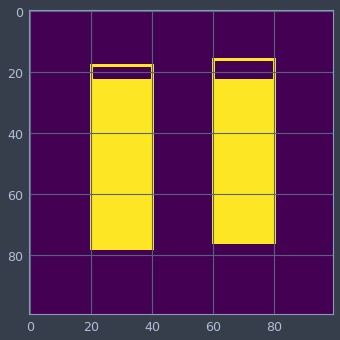

In [4]:
imshow(C.Figure12.data_to_image(data))

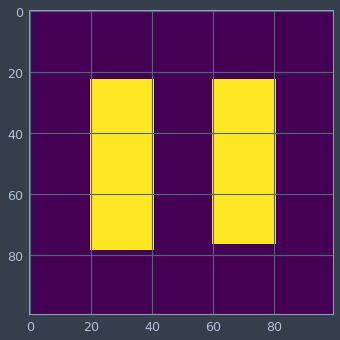

In [5]:
imshow(C.Figure12.data_to_image(data, framed=False))

In [136]:
#
# create many
#

DATATYPE = eval('C.Figure12.data_to_framed_rectangles')
NOISE = True

train_counter = 0
val_counter = 0
test_counter = 0
train_target = 60000
val_target = 20000
test_target = 20000

train_labels = []
val_labels = []
test_labels = []


X_train = np.zeros((train_target, 100, 100), dtype=np.float32)
y_train = np.zeros((train_target, 2), dtype=np.float32)

X_val = np.zeros((val_target, 100, 100), dtype=np.float32)
y_val = np.zeros((val_target, 2), dtype=np.float32)

X_test = np.zeros((test_target, 100, 100), dtype=np.float32)
y_test = np.zeros((test_target, 2), dtype=np.float32)

t0 = time.time()

all_counter = 0
while train_counter < train_target or val_counter < val_target or test_counter < test_target:
  
  all_counter += 1
  
  data, label, parameters = C.Figure12.generate_datapoint()
  
  pot = np.random.choice(3)
  
  # sometimes we know which pot is right
  if label in train_labels:
    pot = 0
  if label in val_labels:
    pot = 1
  if label in test_labels:
    pot = 2
  
  if pot == 0 and train_counter < train_target:

    if label not in train_labels:
      train_labels.append(label)
    
    #
    image = DATATYPE(data)
    image = image.astype(np.float32)
      
    # add noise?
    if NOISE:
      image += np.random.uniform(0, 0.05,(100,100))
      
    # safe to add to training
    X_train[train_counter] = image
    y_train[train_counter] = label
    train_counter += 1
    
  elif pot == 1 and val_counter < val_target:

    if label not in val_labels:
      val_labels.append(label)
      
    image = DATATYPE(data)
    image = image.astype(np.float32)
      
    # add noise?
    if NOISE:
      image += np.random.uniform(0, 0.05,(100,100))
      
    # safe to add to training
    X_val[val_counter] = image
    y_val[val_counter] = label
    val_counter += 1
    
  elif pot == 2 and test_counter < test_target:

    if label not in test_labels:
      test_labels.append(label)
      
    image = DATATYPE(data)
    image = image.astype(np.float32)
      
    # add noise?
    if NOISE:
      image += np.random.uniform(0, 0.05,(100,100))
      
    # safe to add to training
    X_test[test_counter] = image
    y_test[test_counter] = label
    test_counter += 1
    
print 'Done', time.time()-t0


Done 27.7907910347


31997 [ 57.  58.]


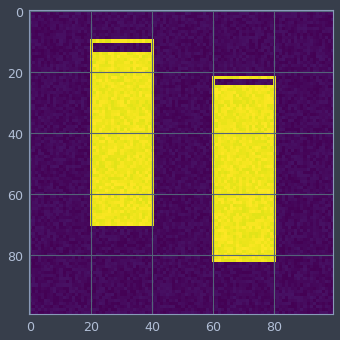

In [137]:
which = np.random.randint(len(X_train))
imshow(X_train[which])
print which, y_train[which]

12003 [ 52.  50.]


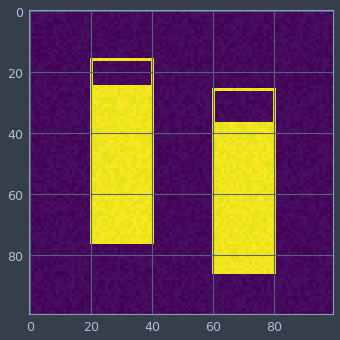

In [144]:
which = np.random.randint(len(X_val))
imshow(X_val[which])
print which, y_val[which]

In [138]:
y_train.min(), y_train.max()

(49.0, 60.0)

In [103]:
50/51.

0.9803921568627451

In [142]:
len(range(y_train.min(),int(y_train.max()+1)))

12

In [135]:
parameters

67600

In [33]:
#
# create many
#

DATATYPE = eval('C.Figure12.data_to_bars')
NOISE = True

#
#
# DATA GENERATION
#
#
def in_array(haystack, needle):
  for h in haystack:
    if np.array_equal(needle, h):
      return True
  return False

train_target = 6000
val_target = 2000
test_target = 2000


# # get global min and max
# global_min = np.inf
# global_max = -np.inf
# for N in range(train_target+val_target+test_target):
  
#   data, label, parameters = C.Figure12.generate_datapoint()
  
#   global_min = min(label, global_min)
#   global_max = max(label, global_max)
  
#   print label, global_min, global_max
# # end of global min max


X_train = np.zeros((train_target, 100, 100), dtype=np.float32)
y_train = np.zeros((train_target, 2), dtype=np.float32)
train_counter = 0

X_val = np.zeros((val_target, 100, 100), dtype=np.float32)
y_val = np.zeros((val_target, 2), dtype=np.float32)
val_counter = 0

X_test = np.zeros((test_target, 100, 100), dtype=np.float32)
y_test = np.zeros((test_target, 2), dtype=np.float32)
test_counter = 0

t0 = time.time()

all_counter = 0
while train_counter < train_target or val_counter < val_target or test_counter < test_target:
  
  if (all_counter % 1000) == 0:
    print 'another 1000'
  
  all_counter += 1
  
  data, label, parameters = C.Figure12.generate_datapoint()
  
  

  
  
  pot = np.random.choice(3)
  
  # adjust pot in case we already know where it goes
  if in_array(y_train, label):
    # this must be pot 0
    pot = 0
  elif in_array(y_val, label):
    # this must be pot 1
    pot = 1
  elif in_array(y_test, label):
    # this must be pot 2
    pot = 2

  if pot == 0 and train_counter < train_target:
    # a training candidate
#     if in_array(y_val, label) or in_array(y_test, label):
#       # no thank you
#       continue
      
    #
    image = DATATYPE(data)
    image = image.astype(np.float32)
      
    # add noise?
    if NOISE:
      image += np.random.uniform(0, 0.05,(100,100))
      
    # safe to add to training
    X_train[train_counter] = image
    y_train[train_counter] = label
    train_counter += 1
    
  elif pot == 1 and val_counter < val_target:
    # a validation candidate
#     if in_array(y_test, label) or in_array(y_train, label):
#       # no thank you
#       continue
      
    #
    image = DATATYPE(data)
    image = image.astype(np.float32)
      
    # add noise?
    if NOISE:
      image += np.random.uniform(0, 0.05,(100,100))
      
    # safe to add to validation
    X_val[val_counter] = image
    y_val[val_counter] = label
    val_counter += 1
  
  elif pot == 2 and test_counter < test_target:
    # a test candidate
#     if in_array(y_val, label) or in_array(y_train, label):
#       # no thank you
#       continue
      
    #
    image = DATATYPE(data)
    image = image.astype(np.float32)
      
    # add noise?
    if NOISE:
      image += np.random.uniform(0, 0.05,(100,100))
      
    # safe to add to test
    X_test[test_counter] = image
    y_test[test_counter] = label
    test_counter += 1
  
  
  
print 'Done', time.time()-t0, 'seconds (', all_counter, 'iterations)'


#

another 1000
another 1000
another 1000
another 1000
another 1000
another 1000
another 1000
another 1000
another 1000
another 1000
another 1000
another 1000
another 1000
another 1000
another 1000


KeyboardInterrupt: 

In [34]:
train_counter

4183

In [35]:
all_counter

14288

In [36]:
val_counter

2000

In [37]:
test_counter

2000

In [28]:
y_val

array([[ 52.,  54.],
       [ 53.,  51.],
       [ 58.,  59.],
       [ 53.,  51.],
       [ 50.,  56.],
       [ 50.,  57.],
       [ 59.,  59.],
       [ 53.,  58.],
       [ 53.,  58.],
       [ 50.,  54.],
       [ 58.,  52.],
       [ 49.,  51.],
       [ 53.,  59.],
       [ 50.,  55.],
       [ 53.,  48.],
       [ 52.,  53.],
       [ 50.,  58.],
       [ 53.,  51.],
       [ 56.,  52.],
       [ 55.,  58.],
       [ 52.,  50.],
       [ 58.,  59.],
       [ 53.,  48.],
       [ 56.,  52.],
       [ 50.,  54.],
       [ 52.,  50.],
       [ 56.,  56.],
       [ 55.,  53.],
       [ 52.,  54.],
       [ 50.,  58.],
       [ 49.,  51.],
       [ 52.,  54.],
       [ 55.,  49.],
       [ 49.,  48.],
       [ 57.,  49.],
       [ 57.,  49.],
       [ 58.,  54.],
       [ 57.,  55.],
       [ 52.,  53.],
       [ 59.,  58.],
       [ 52.,  49.],
       [ 55.,  58.],
       [ 55.,  54.],
       [ 57.,  53.],
       [ 53.,  51.],
       [ 50.,  55.],
       [ 53.,  48.],
       [ 59.,